# PyGraSPI Introduction

This notebook provides an introduction to using the PyGraSPI API. PyGraSPI provides a set of features or descriptors from sample microstructures. It is an alternative to using 2-point stats in homogenization workflows for materials science AI applications. PyGraSPI currently provides a function, `make_descriptors`, that takes a set of microstructures and returns a set of descriptors in a Pandas dataframe. PyGraSPI returns two main categories of descriptors. The first is based on the graph network generated from the microstructure where the graph nodes are colored based on the material phase. This method provides descriptors such as vertex count, tortuosity and connected components. The second method, based on the skeleton of the graph, provides features concerned with the internal cycles and intersections in the graph.

create environment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.getcwd()

'/content'

In [3]:
os.chdir('/content/drive/MyDrive/pygraspi-main')
os.getcwd()

'/content/drive/MyDrive/pygraspi-main'

In [5]:
pip install dask-ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 148 kB 11.6 MB/s 
     |████████████████████████████████| 837 kB 55.4 MB/s 
     |████████████████████████████████| 140 kB 53.9 MB/s 
     |████████████████████████████████| 830 kB 57.1 MB/s 
     |████████████████████████████████| 822 kB 57.5 MB/s 
     |████████████████████████████████| 802 kB 56.8 MB/s 
     |████████████████████████████████| 802 kB 69.3 MB/s 
     |████████████████████████████████| 793 kB 68.9 MB/s 
     |████████████████████████████████| 793 kB 68.9 MB/s 
     |████████████████████████████████| 791 kB 55.8 MB/s 
     |████████████████████████████████| 786 kB 57.5 MB/s 
     |████████████████████████████████| 779 kB 59.3 MB/s 
     |████████████████████████████████| 778 kB 56.7 MB/s 
     |████████████████████████████████| 776 kB 50.7 MB/s 
     |████████████████████████████████| 769 kB 57.4 MB/s 
     |█████████████████████████

In [6]:
!pip install pymks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 527 kB 8.3 MB/s 
     |████████████████████████████████| 208 kB 44.2 MB/s 
     |████████████████████████████████| 297 kB 47.0 MB/s 
     |████████████████████████████████| 297 kB 50.1 MB/s 
     |████████████████████████████████| 297 kB 43.6 MB/s 
     |████████████████████████████████| 296 kB 46.6 MB/s 
     |████████████████████████████████| 296 kB 67.4 MB/s 
     |████████████████████████████████| 280 kB 42.2 MB/s 
     |████████████████████████████████| 280 kB 51.1 MB/s 
     |████████████████████████████████| 280 kB 50.8 MB/s 
     |████████████████████████████████| 280 kB 46.9 MB/s 
     |████████████████████████████████| 279 kB 47.9 MB/s 
     |████████████████████████████████| 279 kB 49.4 MB/s 
     |████████████████████████████████| 272 kB 48.2 MB/s 
     |████████████████████████████████| 272 kB 48.6 MB/s 
     |██████████████████████████

In [7]:
pip install dask distributed --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 7.5 MB/s 
  Using cached distributed-2022.2.0-py3-none-any.whl (837 kB)
     |████████████████████████████████| 596 kB 46.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0
  Attempting uninstall: distributed
    Found existing installation: distributed 2.30.1
    Uninstalling distributed-2.30.1:
      Successfully uninstalled distributed-2.30.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
coveralls 0.5 requires coverage<3.999,>=3.6, but you have coverage 6.4.1 which

In [4]:
!pip install sknw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sknw: filename=sknw-0.14-py3-none-any.whl size=3383 sha256=ac657f7c00a3c71fc7db867e17ae5e5274294d73e24a39920d6f819a5cd3def5
  Stored in directory: /root/.cache/pip/wheels/ca/bf/7b/5029002abec61d97b957427f4fd20426707486d99542feb85d
Successfully built sknw


graph-tool

In [5]:
!echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!apt-key adv --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo

Executing: /tmp/apt-key-gpghome.GONqd41jC6/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
gpg: key 612DEFB798507F25: public key "Tiago de Paula Peixoto <tiago@skewed.de>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://downloads.skewed.de/apt bionic InRelease [7,540 B]
Hit:1

In [6]:
#python3-cairo from Ubuntu's reposity is linked with a different python version; we need to improvise
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  python3-cairo*
0 upgraded, 0 newly installed, 1 to remove and 49 not upgraded.
After this operation, 257 kB disk space will be freed.
(Reading database ... 159419 files and directories currently installed.)
Removing python3-cairo:amd64 (1.16.2-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libcairo-script-interpreter2 lib

In [7]:
from pygraspi.combined_descriptors import make_descriptors 

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:1500: RuntimeWarning: Error importing Gtk module: cannot import name '_gi' from 'gi' (/usr/lib/python3/dist-packages/gi/__init__.py); GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


In [11]:
import zipfile

import dask.array as da
import numpy as np
import pandas
from pymks import solve_cahn_hilliard
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from toolz.curried import curry, pipe

In [16]:
"""PyGraSPI Intro
"""

import zipfile

import dask.array as da
import numpy as np
import pandas as pd
from pymks import solve_cahn_hilliard
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from toolz.curried import curry, pipe

from pygraspi.combined_descriptors import make_descriptors

## The Data

The data used here consists of 573 artificially generated microstructures from Cahn-Hilliard simulations with 401x101 shaped grids (see [Jivani et al.](https://doi.org/10.1016/j.commatsci.2021.110409) for more details). Each data sample is generated with a random initial condition and with different initial volume fractions and interaction parameters and run for varying durations. On unzipping the data in `data/cahn-hilliard.zip` there are files of the type `data_X.XXX_Y.Y_NNNNNNN.txt` where the `X.XXX` refer to the volume fraction and the `Y.Y` refer to the interaction parameter values. The `NNNNNN` denotes the number of time steps reached for that particular sample. Note that files with corresponding volume fractions and interaction parameters are from the same simulation (just with varying duration).

In [9]:
os.getcwd()

'/content/drive/MyDrive/pygraspi-main'

In [10]:
@curry
def read_data(zip_stream_, file_name):
    """Read a single CSV file"""
    return np.array(
        pandas.read_csv(
            zip_stream_.open(file_name, "r"), delimiter=" ", header=None
        ).swapaxes(0, 1)
    )


with zipfile.ZipFile("notebooks/data/cahn-hilliard.zip", "r") as zip_stream:
    data = np.array(
        list(
            # pylint: disable=no-value-for-parameter
            map(read_data(zip_stream), zip_stream.namelist()[:3])
        )
    )

    print(data.shape)

(3, 401, 101)


In [12]:
print(zip_stream.namelist())

['cahn-hilliard/data_0.514_2.4_000080.txt', 'cahn-hilliard/data_0.514_2.4_000100.txt', 'cahn-hilliard/data_0.514_2.4_000140.txt', 'cahn-hilliard/data_0.514_2.4_000160.txt', 'cahn-hilliard/data_0.514_2.4_000180.txt', 'cahn-hilliard/data_0.514_2.4_000220.txt', 'cahn-hilliard/data_0.514_2.4_000280.txt', 'cahn-hilliard/data_0.514_2.4_000440.txt', 'cahn-hilliard/data_0.514_2.4_000480.txt', 'cahn-hilliard/data_0.514_2.4_000560.txt', 'cahn-hilliard/data_0.514_2.4_000620.txt', 'cahn-hilliard/data_0.514_2.4_000760.txt', 'cahn-hilliard/data_0.514_2.4_000880.txt', 'cahn-hilliard/data_0.514_2.4_001240.txt', 'cahn-hilliard/data_0.514_2.4_001800.txt', 'cahn-hilliard/data_0.514_2.4_002480.txt', 'cahn-hilliard/data_0.514_2.4_004660.txt', 'cahn-hilliard/data_0.514_2.4_006400.txt', 'cahn-hilliard/data_0.514_2.6_000080.txt', 'cahn-hilliard/data_0.514_2.6_000100.txt', 'cahn-hilliard/data_0.514_2.6_000140.txt', 'cahn-hilliard/data_0.514_2.6_000180.txt', 'cahn-hilliard/data_0.514_2.6_000220.txt', 'cahn-hill

Currently, we are only using 3 samples as the implementation uses NetworkX, which is extremely slow for this category of calculations. The new implementation will use Graph-tool, which is considerably more efficient for these calculations. 

In [20]:
# 10 s
make_descriptors(data)

,branch_length_a,branch_length_b,dist_to_interface_avg_a,dist_to_interface_avg_b,dist_to_interface_max_a,dist_to_interface_max_b,dist_to_interface_min_a,dist_to_interface_min_b,f_skeletal_pixels_a,f_skeletal_pixels_b,...,distance_to_interface,distance_to_interface_0,distance_to_interface_1,interfacial_area,phase_0_cc,phase_0_count,phase_0_interface,phase_1_cc,phase_1_count,phase_1_interface
0,44.71,39.28,9.25,9.50,15.000000,20.591260,1.0,1.0,0.03,0.02,...,4.459273,4.461633,4.457059,5426,15,19600,2697,7,20901,2729
1,46.08,33.81,9.63,10.36,16.124515,20.808652,1.0,1.0,0.03,0.02,...,4.760697,4.790135,4.733790,5082,16,19341,2518,5,21160,2564
2,42.78,32.97,10.72,11.79,17.691806,21.587033,4.0,1.0,0.03,0.02,...,5.261401,5.295170,5.230863,4508,15,19233,2230,4,21268,2278


The following demonstrates how to use the graph descriptors to classify microstructures. 

Here, two categories of microstructure are generated each with 96 samples using a Cahn-Hilliard simulation. The two categories of microstructures differ based on the duration of evolution (10 steps versus 100 steps). This is not a particularly useful machine learning example, but suffices to demonstrate using the graph descriptors alongside Scikit-learn.

The `generate_data` function uses the PyMKS function `solve_cahn_hilliard` to generate the data.

Using all data

In [13]:
@curry
def read_data(zip_stream_, file_name):
    """Read a single CSV file"""
    return np.array(
        pandas.read_csv(
            zip_stream_.open(file_name, "r"), delimiter=" ", header=None
        ).swapaxes(0, 1)
    )


with zipfile.ZipFile("notebooks/data/cahn-hilliard.zip", "r") as zip_stream:
    data = np.array(
        list(
            # pylint: disable=no-value-for-parameter
            map(read_data(zip_stream), zip_stream.namelist()[:])
        )
    )

    print(data.shape)

(573, 401, 101)


In [14]:
len(zip_stream.namelist())

573

In [15]:
file_list = zip_stream.namelist()
file_list

['cahn-hilliard/data_0.514_2.4_000080.txt',
 'cahn-hilliard/data_0.514_2.4_000100.txt',
 'cahn-hilliard/data_0.514_2.4_000140.txt',
 'cahn-hilliard/data_0.514_2.4_000160.txt',
 'cahn-hilliard/data_0.514_2.4_000180.txt',
 'cahn-hilliard/data_0.514_2.4_000220.txt',
 'cahn-hilliard/data_0.514_2.4_000280.txt',
 'cahn-hilliard/data_0.514_2.4_000440.txt',
 'cahn-hilliard/data_0.514_2.4_000480.txt',
 'cahn-hilliard/data_0.514_2.4_000560.txt',
 'cahn-hilliard/data_0.514_2.4_000620.txt',
 'cahn-hilliard/data_0.514_2.4_000760.txt',
 'cahn-hilliard/data_0.514_2.4_000880.txt',
 'cahn-hilliard/data_0.514_2.4_001240.txt',
 'cahn-hilliard/data_0.514_2.4_001800.txt',
 'cahn-hilliard/data_0.514_2.4_002480.txt',
 'cahn-hilliard/data_0.514_2.4_004660.txt',
 'cahn-hilliard/data_0.514_2.4_006400.txt',
 'cahn-hilliard/data_0.514_2.6_000080.txt',
 'cahn-hilliard/data_0.514_2.6_000100.txt',
 'cahn-hilliard/data_0.514_2.6_000140.txt',
 'cahn-hilliard/data_0.514_2.6_000180.txt',
 'cahn-hilliard/data_0.514_2.6_0

In [32]:
# 21 min
df = make_descriptors(data)
df

,branch_length_a,branch_length_b,dist_to_interface_avg_a,dist_to_interface_avg_b,dist_to_interface_max_a,dist_to_interface_max_b,dist_to_interface_min_a,dist_to_interface_min_b,f_skeletal_pixels_a,f_skeletal_pixels_b,...,distance_to_interface,distance_to_interface_0,distance_to_interface_1,interfacial_area,phase_0_cc,phase_0_count,phase_0_interface,phase_1_cc,phase_1_count,phase_1_interface
0,44.71,39.28,9.25,9.50,15.000000,20.591260,1.000000,1.0,0.03,0.02,...,4.459273,4.461633,4.457059,5426,15,19600,2697,7,20901,2729
1,46.08,33.81,9.63,10.36,16.124515,20.808652,1.000000,1.0,0.03,0.02,...,4.760697,4.790135,4.733790,5082,16,19341,2518,5,21160,2564
2,42.78,32.97,10.72,11.79,17.691806,21.587033,4.000000,1.0,0.03,0.02,...,5.261401,5.295170,5.230863,4508,15,19233,2230,4,21268,2278
3,41.83,34.24,11.29,11.90,18.867962,20.880613,6.000000,1.0,0.02,0.02,...,5.427940,5.461208,5.397553,4340,14,19334,2150,5,21167,2190
4,48.43,37.25,11.40,12.66,18.973666,21.000000,1.000000,1.0,0.03,0.01,...,5.624182,5.667133,5.585109,4166,14,19293,2062,4,21208,2104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,40.24,33.13,12.21,13.55,22.203603,22.561028,3.605551,1.0,0.03,0.01,...,6.082936,5.912108,6.209508,3927,17,17237,1925,1,23264,2002
569,41.64,29.67,13.11,16.35,23.600847,23.259407,4.472136,6.0,0.03,0.01,...,6.657144,6.474723,6.791393,3614,16,17170,1772,1,23331,1842
570,44.20,31.10,13.77,16.30,26.627054,24.000000,1.414214,1.0,0.03,0.01,...,7.002642,6.687380,7.235428,3464,15,17203,1701,1,23298,1763
571,48.99,38.00,14.94,16.88,28.653098,27.658633,5.000000,1.0,0.02,0.01,...,7.429644,7.051273,7.711210,3242,13,17280,1597,1,23221,1645


In [33]:
df.to_csv('/content/drive/MyDrive/pygraspi-main/Data/df_cahn-hilliard.csv', index=False)

In [17]:
df = pd.read_csv('/content/drive/MyDrive/pygraspi-main/Data/df_cahn-hilliard.csv')
df

,branch_length_a,branch_length_b,dist_to_interface_avg_a,dist_to_interface_avg_b,dist_to_interface_max_a,dist_to_interface_max_b,dist_to_interface_min_a,dist_to_interface_min_b,f_skeletal_pixels_a,f_skeletal_pixels_b,...,distance_to_interface,distance_to_interface_0,distance_to_interface_1,interfacial_area,phase_0_cc,phase_0_count,phase_0_interface,phase_1_cc,phase_1_count,phase_1_interface
0,44.71,39.28,9.25,9.50,15.000000,20.591260,1.000000,1.0,0.03,0.02,...,4.459273,4.461633,4.457059,5426,15,19600,2697,7,20901,2729
1,46.08,33.81,9.63,10.36,16.124515,20.808652,1.000000,1.0,0.03,0.02,...,4.760697,4.790135,4.733790,5082,16,19341,2518,5,21160,2564
2,42.78,32.97,10.72,11.79,17.691806,21.587033,4.000000,1.0,0.03,0.02,...,5.261401,5.295170,5.230863,4508,15,19233,2230,4,21268,2278
3,41.83,34.24,11.29,11.90,18.867962,20.880613,6.000000,1.0,0.02,0.02,...,5.427940,5.461208,5.397553,4340,14,19334,2150,5,21167,2190
4,48.43,37.25,11.40,12.66,18.973666,21.000000,1.000000,1.0,0.03,0.01,...,5.624182,5.667133,5.585109,4166,14,19293,2062,4,21208,2104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,40.24,33.13,12.21,13.55,22.203603,22.561028,3.605551,1.0,0.03,0.01,...,6.082936,5.912108,6.209508,3927,17,17237,1925,1,23264,2002
569,41.64,29.67,13.11,16.35,23.600847,23.259407,4.472136,6.0,0.03,0.01,...,6.657144,6.474723,6.791393,3614,16,17170,1772,1,23331,1842
570,44.20,31.10,13.77,16.30,26.627054,24.000000,1.414214,1.0,0.03,0.01,...,7.002642,6.687380,7.235428,3464,15,17203,1701,1,23298,1763
571,48.99,38.00,14.94,16.88,28.653098,27.658633,5.000000,1.0,0.02,0.01,...,7.429644,7.051273,7.711210,3242,13,17280,1597,1,23221,1645


In [21]:
def generate_data(n_category, n_chunks, n_domain, seed=99):
    """Generate the Cahn-Hilliard data"""
    da.random.seed(seed)
    solve_ch = curry(solve_cahn_hilliard)(delta_t=1.0, delta_x=0.5)
    x_data_ = pipe(
        da.random.random(
            (n_category * 2, n_domain, n_domain), chunks=(n_chunks, n_domain, n_domain)
        ),
        lambda x: 2 * x - 1,
        lambda x: [
            solve_ch(x[:n_category], n_steps=10),
            solve_ch(x[n_category:], n_steps=100),
        ],
        da.concatenate,
        lambda x: da.where(x > 0, 1, 0).persist(),
    )
    y_data_ = da.from_array(
        np.concatenate([np.zeros(n_category), np.ones(n_category)]).astype(int),
        chunks=(n_chunks,),
    )
    return np.array(x_data_), np.array(y_data_)

Below, `n_category` refers to the number of samples per category, `n_chunks` refers to the number of samples per chunk of data in the Dask array, `n_domain` refers to the number of pixels along an edge of the domain. 

In [22]:
# 45 s
x_data, y_data = generate_data(n_category=96, n_chunks=24, n_domain=101)

The following generates the graph descriptors from the raw microstructures. Note that only `_make_skeletal_descriptors` is used as the graph descriptors are inefficient in the current version of PyGraSPI

In [23]:
# replace this with make_descriptors when switched over to use Graph-tool
# 2 min
x_graph = make_descriptors(x_data)

The redundant, constant-value features need to be removed otherwise the `LogisticRegression` fails to execute.

In [24]:
mask = ~x_graph.eq(x_graph.iloc[0]).all()
x_graph_clean = x_graph.loc[:, mask]

In [25]:
x_graph_clean

,branch_length_a,branch_length_b,dist_to_interface_avg_a,dist_to_interface_avg_b,dist_to_interface_max_a,dist_to_interface_max_b,f_skeletal_pixels_a,f_skeletal_pixels_b,number_of_branches_a,number_of_branches_b,...,distance_to_interface,distance_to_interface_0,distance_to_interface_1,interfacial_area,phase_0_cc,phase_0_count,phase_0_interface,phase_1_cc,phase_1_count,phase_1_interface
0,12.81,16.22,4.09,4.14,8.485281,9.433981,0.07,0.06,62.0,40.0,...,2.506715,2.510850,2.502704,2986,10,5023,1486,5,5178,1500
1,15.53,18.43,4.17,4.68,8.000000,17.888544,0.06,0.07,41.0,42.0,...,2.662680,2.843652,2.455654,2807,7,5443,1416,10,4758,1391
2,15.63,17.95,4.16,4.48,7.810250,11.661904,0.06,0.07,44.0,43.0,...,2.564062,2.682913,2.436891,2901,6,5273,1453,7,4928,1448
3,13.42,16.09,4.08,4.22,11.313708,9.000000,0.08,0.05,65.0,40.0,...,2.468778,2.431373,2.503997,3011,14,4947,1487,5,5254,1524
4,13.00,13.48,4.10,4.35,8.944272,9.433981,0.06,0.06,56.0,55.0,...,2.547887,2.599510,2.491931,2877,11,5306,1442,10,4895,1435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,24.75,26.36,6.87,6.15,11.180340,13.341664,0.03,0.05,14.0,22.0,...,3.453877,3.425830,3.483166,1931,3,5211,980,8,4990,951
188,54.66,36.32,6.65,6.62,13.000000,15.000000,0.04,0.05,8.0,14.0,...,3.589746,3.623704,3.555621,1818,4,5113,909,4,5088,909
189,28.36,24.15,6.32,6.93,12.041595,15.524175,0.04,0.04,15.0,13.0,...,3.437702,3.516673,3.360643,1911,9,5038,946,3,5163,965
190,26.23,25.41,6.57,6.61,10.770330,14.142136,0.04,0.04,17.0,14.0,...,3.383296,3.409710,3.357226,1910,7,5067,954,6,5134,956


Train / test split the data.

In [26]:
x_train_graph, x_test_graph, y_train, y_test = train_test_split(
    np.array(x_graph_clean), y_data, test_size=0.2, random_state=99
)

The graph data is required to be scaled for the logistic regression. Note that the scaler is only fit using the training data (not all the data).

In [27]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_graph)
x_test_scaled = scaler.transform(x_test_graph)

train ther regresson

In [28]:
# NBVAL_IGNORE_OUTPUT
model = LogisticRegression().fit(x_train_scaled, y_train)

In [29]:
y_predict = model.predict(x_test_scaled)

This is a very easy classification problem and so the predictions are perfect.

In [30]:
confusion_matrix(y_test, y_predict)

array([[22,  0],
       [ 0, 17]])

Create correspondent Jsc

In [19]:
df_load = pd.read_csv('/content/drive/MyDrive/pygraspi-main/notebooks/data/CombinedPSP.csv')
df_load

,PHI,CHI,NN,JSC,ABS_f_D,DISS_wf10_D,STAT_n,STAT_e,STAT_n_D,STAT_n_A,...,CT_f_e_conn,CT_f_conn_D_An,CT_f_conn_A_Ca,CT_e_conn,CT_e_D_An,CT_e_A_Ca,CT_f_D_tort1,CT_f_A_tort1,CT_n_D_adj_An,CT_n_A_adj_Ca
0,0.50,2.2,143,-60.626,0.494161,0.455724,40501,2402,20014,20487,...,0.529559,0.639502,0.907551,1272,1533,2156,0.353934,0.268703,145,176
1,0.50,2.2,200,-60.143,0.499395,0.429118,40501,2227,20226,20275,...,0.333633,0.691437,0.668508,743,1533,1454,0.390204,0.332153,147,174
2,0.50,2.2,250,-57.374,0.497914,0.400567,40501,2053,20166,20335,...,0.531417,0.679163,0.875387,1091,1370,1785,0.457068,0.326105,155,185
3,0.50,2.2,300,-51.381,0.495617,0.379442,40501,1933,20073,20428,...,0.538024,0.684452,0.880948,1040,1301,1684,0.507242,0.351967,157,180
4,0.50,2.2,450,-48.672,0.491198,0.340753,40501,1723,19894,20607,...,0.603018,0.700010,0.930169,1039,1186,1586,0.587606,0.351263,174,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,0.63,4.0,2050,-40.300,0.376040,0.367105,40501,1730,15230,25271,...,0.154913,0.160210,1.000000,268,262,1776,1.000000,0.418978,133,229
1704,0.63,4.0,2150,-38.300,0.375645,0.355383,40501,1632,15214,25287,...,0.166667,0.165966,1.000000,272,266,1670,1.000000,0.425476,133,228
1705,0.63,4.0,2800,-33.400,0.375003,0.337699,40501,1532,15188,25313,...,0.172977,0.163682,1.000000,265,258,1566,1.000000,0.415873,130,225
1706,0.63,4.0,6050,-21.500,0.373620,0.317051,40501,1403,15132,25369,...,0.132573,0.114922,1.000000,186,181,1430,1.000000,0.442233,93,247


In [20]:
# add 2 zeros in front of numbers
df_load['NN'] = df_load['NN'].apply(lambda x: '{0:0>6}'.format(x))
df_load

,PHI,CHI,NN,JSC,ABS_f_D,DISS_wf10_D,STAT_n,STAT_e,STAT_n_D,STAT_n_A,...,CT_f_e_conn,CT_f_conn_D_An,CT_f_conn_A_Ca,CT_e_conn,CT_e_D_An,CT_e_A_Ca,CT_f_D_tort1,CT_f_A_tort1,CT_n_D_adj_An,CT_n_A_adj_Ca
0,0.50,2.2,000143,-60.626,0.494161,0.455724,40501,2402,20014,20487,...,0.529559,0.639502,0.907551,1272,1533,2156,0.353934,0.268703,145,176
1,0.50,2.2,000200,-60.143,0.499395,0.429118,40501,2227,20226,20275,...,0.333633,0.691437,0.668508,743,1533,1454,0.390204,0.332153,147,174
2,0.50,2.2,000250,-57.374,0.497914,0.400567,40501,2053,20166,20335,...,0.531417,0.679163,0.875387,1091,1370,1785,0.457068,0.326105,155,185
3,0.50,2.2,000300,-51.381,0.495617,0.379442,40501,1933,20073,20428,...,0.538024,0.684452,0.880948,1040,1301,1684,0.507242,0.351967,157,180
4,0.50,2.2,000450,-48.672,0.491198,0.340753,40501,1723,19894,20607,...,0.603018,0.700010,0.930169,1039,1186,1586,0.587606,0.351263,174,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,0.63,4.0,002050,-40.300,0.376040,0.367105,40501,1730,15230,25271,...,0.154913,0.160210,1.000000,268,262,1776,1.000000,0.418978,133,229
1704,0.63,4.0,002150,-38.300,0.375645,0.355383,40501,1632,15214,25287,...,0.166667,0.165966,1.000000,272,266,1670,1.000000,0.425476,133,228
1705,0.63,4.0,002800,-33.400,0.375003,0.337699,40501,1532,15188,25313,...,0.172977,0.163682,1.000000,265,258,1566,1.000000,0.415873,130,225
1706,0.63,4.0,006050,-21.500,0.373620,0.317051,40501,1403,15132,25369,...,0.132573,0.114922,1.000000,186,181,1430,1.000000,0.442233,93,247


In [21]:
df_load.iloc[550:1046,0] = df_load.iloc[550:1046,0].apply(lambda x: round(x, 3))

df_load['Conditions'] = df_load[df_load.columns[0:3]].apply(
    lambda x: '_'.join(x.astype(str)),
    axis=1
)


In [23]:
df_load['Conditions']=df_load['Conditions'].astype(str)+'.txt'

df_load['Conditions']='data_'+ df_load['Conditions'].astype(str)
df_load

,PHI,CHI,NN,JSC,ABS_f_D,DISS_wf10_D,STAT_n,STAT_e,STAT_n_D,STAT_n_A,...,CT_f_conn_D_An,CT_f_conn_A_Ca,CT_e_conn,CT_e_D_An,CT_e_A_Ca,CT_f_D_tort1,CT_f_A_tort1,CT_n_D_adj_An,CT_n_A_adj_Ca,Conditions
0,0.50,2.2,000143,-60.626,0.494161,0.455724,40501,2402,20014,20487,...,0.639502,0.907551,1272,1533,2156,0.353934,0.268703,145,176,data_0.5_2.2_000143.txt
1,0.50,2.2,000200,-60.143,0.499395,0.429118,40501,2227,20226,20275,...,0.691437,0.668508,743,1533,1454,0.390204,0.332153,147,174,data_0.5_2.2_000200.txt
2,0.50,2.2,000250,-57.374,0.497914,0.400567,40501,2053,20166,20335,...,0.679163,0.875387,1091,1370,1785,0.457068,0.326105,155,185,data_0.5_2.2_000250.txt
3,0.50,2.2,000300,-51.381,0.495617,0.379442,40501,1933,20073,20428,...,0.684452,0.880948,1040,1301,1684,0.507242,0.351967,157,180,data_0.5_2.2_000300.txt
4,0.50,2.2,000450,-48.672,0.491198,0.340753,40501,1723,19894,20607,...,0.700010,0.930169,1039,1186,1586,0.587606,0.351263,174,164,data_0.5_2.2_000450.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,0.63,4.0,002050,-40.300,0.376040,0.367105,40501,1730,15230,25271,...,0.160210,1.000000,268,262,1776,1.000000,0.418978,133,229,data_0.63_4.0_002050.txt
1704,0.63,4.0,002150,-38.300,0.375645,0.355383,40501,1632,15214,25287,...,0.165966,1.000000,272,266,1670,1.000000,0.425476,133,228,data_0.63_4.0_002150.txt
1705,0.63,4.0,002800,-33.400,0.375003,0.337699,40501,1532,15188,25313,...,0.163682,1.000000,265,258,1566,1.000000,0.415873,130,225,data_0.63_4.0_002800.txt
1706,0.63,4.0,006050,-21.500,0.373620,0.317051,40501,1403,15132,25369,...,0.114922,1.000000,186,181,1430,1.000000,0.442233,93,247,data_0.63_4.0_006050.txt


In [41]:
df_load['Conditions']='cahn-hilliard/'+ df_load['Conditions'].astype(str)
df_load

,PHI,CHI,NN,JSC,ABS_f_D,DISS_wf10_D,STAT_n,STAT_e,STAT_n_D,STAT_n_A,...,CT_f_conn_D_An,CT_f_conn_A_Ca,CT_e_conn,CT_e_D_An,CT_e_A_Ca,CT_f_D_tort1,CT_f_A_tort1,CT_n_D_adj_An,CT_n_A_adj_Ca,Conditions
0,0.50,2.2,000143,-60.626,0.494161,0.455724,40501,2402,20014,20487,...,0.639502,0.907551,1272,1533,2156,0.353934,0.268703,145,176,cahn-hilliard/data_0.5_2.2_000143.txt
1,0.50,2.2,000200,-60.143,0.499395,0.429118,40501,2227,20226,20275,...,0.691437,0.668508,743,1533,1454,0.390204,0.332153,147,174,cahn-hilliard/data_0.5_2.2_000200.txt
2,0.50,2.2,000250,-57.374,0.497914,0.400567,40501,2053,20166,20335,...,0.679163,0.875387,1091,1370,1785,0.457068,0.326105,155,185,cahn-hilliard/data_0.5_2.2_000250.txt
3,0.50,2.2,000300,-51.381,0.495617,0.379442,40501,1933,20073,20428,...,0.684452,0.880948,1040,1301,1684,0.507242,0.351967,157,180,cahn-hilliard/data_0.5_2.2_000300.txt
4,0.50,2.2,000450,-48.672,0.491198,0.340753,40501,1723,19894,20607,...,0.700010,0.930169,1039,1186,1586,0.587606,0.351263,174,164,cahn-hilliard/data_0.5_2.2_000450.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,0.63,4.0,002050,-40.300,0.376040,0.367105,40501,1730,15230,25271,...,0.160210,1.000000,268,262,1776,1.000000,0.418978,133,229,cahn-hilliard/data_0.63_4.0_002050.txt
1704,0.63,4.0,002150,-38.300,0.375645,0.355383,40501,1632,15214,25287,...,0.165966,1.000000,272,266,1670,1.000000,0.425476,133,228,cahn-hilliard/data_0.63_4.0_002150.txt
1705,0.63,4.0,002800,-33.400,0.375003,0.337699,40501,1532,15188,25313,...,0.163682,1.000000,265,258,1566,1.000000,0.415873,130,225,cahn-hilliard/data_0.63_4.0_002800.txt
1706,0.63,4.0,006050,-21.500,0.373620,0.317051,40501,1403,15132,25369,...,0.114922,1.000000,186,181,1430,1.000000,0.442233,93,247,cahn-hilliard/data_0.63_4.0_006050.txt


In [43]:
df_list = pd.DataFrame(file_list, columns = ['Conditions'])
df_list

,Conditions
0,cahn-hilliard/data_0.514_2.4_000080.txt
1,cahn-hilliard/data_0.514_2.4_000100.txt
2,cahn-hilliard/data_0.514_2.4_000140.txt
3,cahn-hilliard/data_0.514_2.4_000160.txt
4,cahn-hilliard/data_0.514_2.4_000180.txt
...,...
568,cahn-hilliard/data_0.558_2.4_000280.txt
569,cahn-hilliard/data_0.558_2.4_000340.txt
570,cahn-hilliard/data_0.558_2.4_000360.txt
571,cahn-hilliard/data_0.558_2.4_000440.txt


In [44]:
df_jsc = pd.merge(df_list, df_load, on='Conditions')
df_jsc

,Conditions,PHI,CHI,NN,JSC,ABS_f_D,DISS_wf10_D,STAT_n,STAT_e,STAT_n_D,...,CT_f_e_conn,CT_f_conn_D_An,CT_f_conn_A_Ca,CT_e_conn,CT_e_D_An,CT_e_A_Ca,CT_f_D_tort1,CT_f_A_tort1,CT_n_D_adj_An,CT_n_A_adj_Ca
0,cahn-hilliard/data_0.514_2.4_000080.txt,0.514,2.4,000080,-77.766,0.483939,0.512406,40501,2713,19600,...,0.372650,0.480051,0.931343,1011,1262,2490,0.425975,0.323898,172,194
1,cahn-hilliard/data_0.514_2.4_000100.txt,0.514,2.4,000100,-78.770,0.477544,0.480653,40501,2541,19341,...,0.391578,0.471020,0.953828,995,1146,2413,0.493963,0.318040,184,206
2,cahn-hilliard/data_0.514_2.4_000140.txt,0.514,2.4,000140,-80.616,0.474877,0.436698,40501,2254,19233,...,0.355368,0.441481,0.960692,801,923,2154,0.602403,0.392032,206,238
3,cahn-hilliard/data_0.514_2.4_000160.txt,0.514,2.4,000160,-81.556,0.477371,0.421284,40501,2171,19334,...,0.396131,0.472535,0.964945,860,972,2076,0.564032,0.420024,215,230
4,cahn-hilliard/data_0.514_2.4_000180.txt,0.514,2.4,000180,-80.518,0.476359,0.405835,40501,2083,19293,...,0.395103,0.475872,0.967371,823,929,1994,0.532186,0.464418,213,235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,cahn-hilliard/data_0.558_2.4_000280.txt,0.558,2.4,000280,-70.456,0.425594,0.405298,40501,1964,17237,...,0.229124,0.251262,1.000000,450,443,2002,0.945740,0.498839,233,193
569,cahn-hilliard/data_0.558_2.4_000340.txt,0.558,2.4,000340,-62.628,0.423940,0.375592,40501,1807,17170,...,0.270614,0.313687,1.000000,489,481,1842,0.942629,0.492221,253,189
570,cahn-hilliard/data_0.558_2.4_000360.txt,0.558,2.4,000360,-58.958,0.424755,0.364714,40501,1732,17203,...,0.278291,0.317619,1.000000,482,474,1763,0.960469,0.513692,256,186
571,cahn-hilliard/data_0.558_2.4_000440.txt,0.558,2.4,000440,-56.279,0.426656,0.343266,40501,1621,17280,...,0.299198,0.330208,1.000000,485,477,1645,0.992815,0.491452,259,181


In [48]:
df_combine = pd.concat([df_jsc.iloc[:,0], df_jsc.iloc[:,4], df], axis =1)
df_combine

,Conditions,JSC,branch_length_a,branch_length_b,dist_to_interface_avg_a,dist_to_interface_avg_b,dist_to_interface_max_a,dist_to_interface_max_b,dist_to_interface_min_a,dist_to_interface_min_b,...,distance_to_interface,distance_to_interface_0,distance_to_interface_1,interfacial_area,phase_0_cc,phase_0_count,phase_0_interface,phase_1_cc,phase_1_count,phase_1_interface
0,cahn-hilliard/data_0.514_2.4_000080.txt,-77.766,44.71,39.28,9.25,9.50,15.000000,20.591260,1.000000,1.0,...,4.459273,4.461633,4.457059,5426,15,19600,2697,7,20901,2729
1,cahn-hilliard/data_0.514_2.4_000100.txt,-78.770,46.08,33.81,9.63,10.36,16.124515,20.808652,1.000000,1.0,...,4.760697,4.790135,4.733790,5082,16,19341,2518,5,21160,2564
2,cahn-hilliard/data_0.514_2.4_000140.txt,-80.616,42.78,32.97,10.72,11.79,17.691806,21.587033,4.000000,1.0,...,5.261401,5.295170,5.230863,4508,15,19233,2230,4,21268,2278
3,cahn-hilliard/data_0.514_2.4_000160.txt,-81.556,41.83,34.24,11.29,11.90,18.867962,20.880613,6.000000,1.0,...,5.427940,5.461208,5.397553,4340,14,19334,2150,5,21167,2190
4,cahn-hilliard/data_0.514_2.4_000180.txt,-80.518,48.43,37.25,11.40,12.66,18.973666,21.000000,1.000000,1.0,...,5.624182,5.667133,5.585109,4166,14,19293,2062,4,21208,2104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,cahn-hilliard/data_0.558_2.4_000280.txt,-70.456,40.24,33.13,12.21,13.55,22.203603,22.561028,3.605551,1.0,...,6.082936,5.912108,6.209508,3927,17,17237,1925,1,23264,2002
569,cahn-hilliard/data_0.558_2.4_000340.txt,-62.628,41.64,29.67,13.11,16.35,23.600847,23.259407,4.472136,6.0,...,6.657144,6.474723,6.791393,3614,16,17170,1772,1,23331,1842
570,cahn-hilliard/data_0.558_2.4_000360.txt,-58.958,44.20,31.10,13.77,16.30,26.627054,24.000000,1.414214,1.0,...,7.002642,6.687380,7.235428,3464,15,17203,1701,1,23298,1763
571,cahn-hilliard/data_0.558_2.4_000440.txt,-56.279,48.99,38.00,14.94,16.88,28.653098,27.658633,5.000000,1.0,...,7.429644,7.051273,7.711210,3242,13,17280,1597,1,23221,1645


In [50]:
df_combine.to_csv('573_skeletonData', index = True)

Feature selection model

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt


In [52]:
df_combine['JSC']=df_combine['JSC'].abs()
df_combine

,Conditions,JSC,branch_length_a,branch_length_b,dist_to_interface_avg_a,dist_to_interface_avg_b,dist_to_interface_max_a,dist_to_interface_max_b,dist_to_interface_min_a,dist_to_interface_min_b,...,distance_to_interface,distance_to_interface_0,distance_to_interface_1,interfacial_area,phase_0_cc,phase_0_count,phase_0_interface,phase_1_cc,phase_1_count,phase_1_interface
0,cahn-hilliard/data_0.514_2.4_000080.txt,77.766,44.71,39.28,9.25,9.50,15.000000,20.591260,1.000000,1.0,...,4.459273,4.461633,4.457059,5426,15,19600,2697,7,20901,2729
1,cahn-hilliard/data_0.514_2.4_000100.txt,78.770,46.08,33.81,9.63,10.36,16.124515,20.808652,1.000000,1.0,...,4.760697,4.790135,4.733790,5082,16,19341,2518,5,21160,2564
2,cahn-hilliard/data_0.514_2.4_000140.txt,80.616,42.78,32.97,10.72,11.79,17.691806,21.587033,4.000000,1.0,...,5.261401,5.295170,5.230863,4508,15,19233,2230,4,21268,2278
3,cahn-hilliard/data_0.514_2.4_000160.txt,81.556,41.83,34.24,11.29,11.90,18.867962,20.880613,6.000000,1.0,...,5.427940,5.461208,5.397553,4340,14,19334,2150,5,21167,2190
4,cahn-hilliard/data_0.514_2.4_000180.txt,80.518,48.43,37.25,11.40,12.66,18.973666,21.000000,1.000000,1.0,...,5.624182,5.667133,5.585109,4166,14,19293,2062,4,21208,2104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,cahn-hilliard/data_0.558_2.4_000280.txt,70.456,40.24,33.13,12.21,13.55,22.203603,22.561028,3.605551,1.0,...,6.082936,5.912108,6.209508,3927,17,17237,1925,1,23264,2002
569,cahn-hilliard/data_0.558_2.4_000340.txt,62.628,41.64,29.67,13.11,16.35,23.600847,23.259407,4.472136,6.0,...,6.657144,6.474723,6.791393,3614,16,17170,1772,1,23331,1842
570,cahn-hilliard/data_0.558_2.4_000360.txt,58.958,44.20,31.10,13.77,16.30,26.627054,24.000000,1.414214,1.0,...,7.002642,6.687380,7.235428,3464,15,17203,1701,1,23298,1763
571,cahn-hilliard/data_0.558_2.4_000440.txt,56.279,48.99,38.00,14.94,16.88,28.653098,27.658633,5.000000,1.0,...,7.429644,7.051273,7.711210,3242,13,17280,1597,1,23221,1645


In [53]:
df_refine=df_combine.iloc[:,1:]
df_refine

,JSC,branch_length_a,branch_length_b,dist_to_interface_avg_a,dist_to_interface_avg_b,dist_to_interface_max_a,dist_to_interface_max_b,dist_to_interface_min_a,dist_to_interface_min_b,f_skeletal_pixels_a,...,distance_to_interface,distance_to_interface_0,distance_to_interface_1,interfacial_area,phase_0_cc,phase_0_count,phase_0_interface,phase_1_cc,phase_1_count,phase_1_interface
0,77.766,44.71,39.28,9.25,9.50,15.000000,20.591260,1.000000,1.0,0.03,...,4.459273,4.461633,4.457059,5426,15,19600,2697,7,20901,2729
1,78.770,46.08,33.81,9.63,10.36,16.124515,20.808652,1.000000,1.0,0.03,...,4.760697,4.790135,4.733790,5082,16,19341,2518,5,21160,2564
2,80.616,42.78,32.97,10.72,11.79,17.691806,21.587033,4.000000,1.0,0.03,...,5.261401,5.295170,5.230863,4508,15,19233,2230,4,21268,2278
3,81.556,41.83,34.24,11.29,11.90,18.867962,20.880613,6.000000,1.0,0.02,...,5.427940,5.461208,5.397553,4340,14,19334,2150,5,21167,2190
4,80.518,48.43,37.25,11.40,12.66,18.973666,21.000000,1.000000,1.0,0.03,...,5.624182,5.667133,5.585109,4166,14,19293,2062,4,21208,2104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,70.456,40.24,33.13,12.21,13.55,22.203603,22.561028,3.605551,1.0,0.03,...,6.082936,5.912108,6.209508,3927,17,17237,1925,1,23264,2002
569,62.628,41.64,29.67,13.11,16.35,23.600847,23.259407,4.472136,6.0,0.03,...,6.657144,6.474723,6.791393,3614,16,17170,1772,1,23331,1842
570,58.958,44.20,31.10,13.77,16.30,26.627054,24.000000,1.414214,1.0,0.03,...,7.002642,6.687380,7.235428,3464,15,17203,1701,1,23298,1763
571,56.279,48.99,38.00,14.94,16.88,28.653098,27.658633,5.000000,1.0,0.02,...,7.429644,7.051273,7.711210,3242,13,17280,1597,1,23221,1645


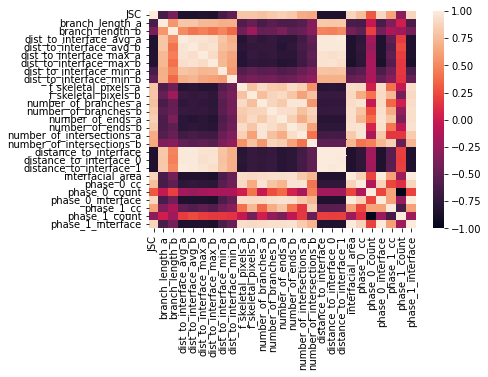

In [57]:
df_refine = df_refine.apply(pd.to_numeric, errors='ignore')
corr=df_refine.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

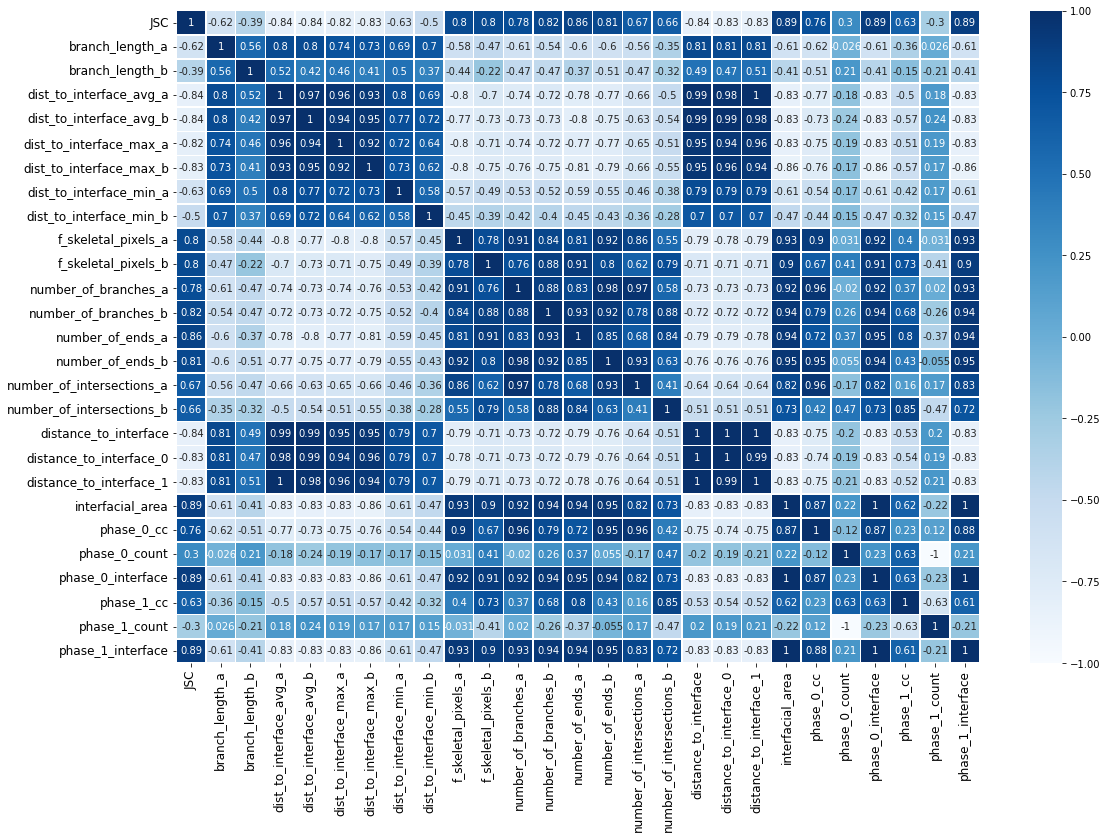

In [56]:
df_refine = df_refine.apply(pd.to_numeric, errors='ignore')
corr=df_refine.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap='Blues',annot=True,linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('Correlation matrix.pdf', dpi=300, bbox_inches='tight')

In [58]:
X = df_refine.iloc[:,1:].values
y = df_refine.iloc[:,0].values

In [60]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
feat_names = df_refine.columns[1:]
rf = RandomForestRegressor(random_state=99)
rf.fit(X, y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feat_names), 
             reverse=True))

Features sorted by their score:
[(0.2598, 'dist_to_interface_avg_a'), (0.1799, 'phase_0_interface'), (0.1188, 'dist_to_interface_avg_b'), (0.0945, 'distance_to_interface_0'), (0.0758, 'interfacial_area'), (0.0429, 'phase_1_interface'), (0.0384, 'number_of_branches_b'), (0.0335, 'distance_to_interface'), (0.0291, 'distance_to_interface_1'), (0.0173, 'phase_1_count'), (0.0161, 'phase_0_count'), (0.014, 'dist_to_interface_max_b'), (0.0118, 'branch_length_b'), (0.0107, 'dist_to_interface_max_a'), (0.008, 'phase_1_cc'), (0.0079, 'branch_length_a'), (0.0071, 'phase_0_cc'), (0.0067, 'f_skeletal_pixels_b'), (0.0066, 'number_of_ends_a'), (0.0057, 'number_of_ends_b'), (0.0045, 'number_of_intersections_b'), (0.0034, 'number_of_branches_a'), (0.0033, 'dist_to_interface_min_a'), (0.0027, 'number_of_intersections_a'), (0.001, 'dist_to_interface_min_b'), (0.0005, 'f_skeletal_pixels_a')]


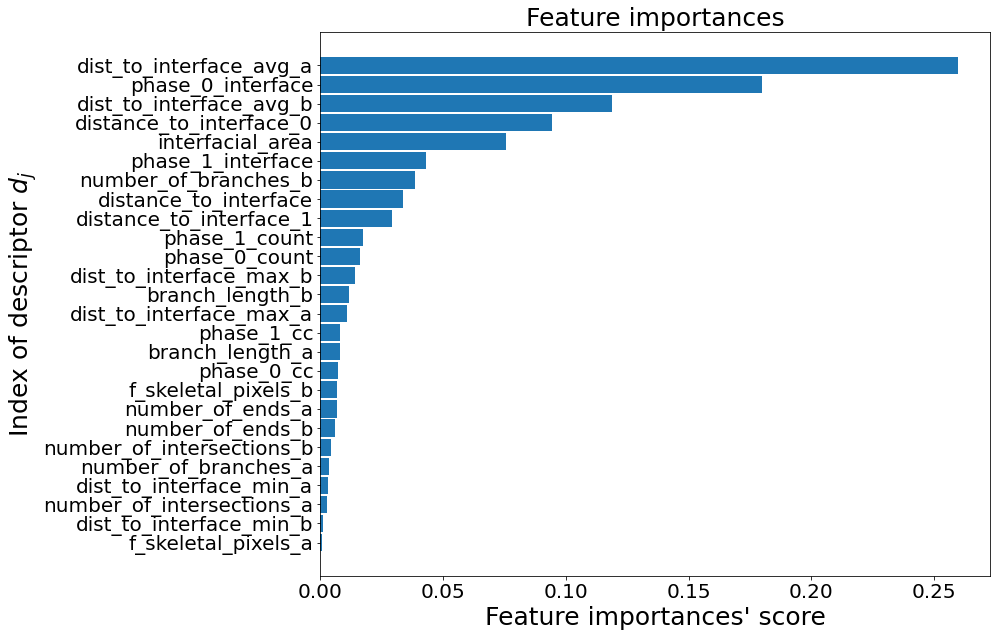

In [61]:
plt.figure(figsize=(12,10))
# plt.figure()
importances=rf.feature_importances_
x_plot = [2*i for i in range(len(importances))]
indices=np.argsort(importances)
plt.title("Feature importances",fontsize=25)
plt.barh(x_plot, importances[indices],height=1.8,color='#1f77b4')
# ,height=1.8
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.xlabel("Feature importances' score",fontsize=25)
plt.ylabel("Index of descriptor $d_{j}$",fontsize=25)
plt.yticks(x_plot, feat_names[indices],fontsize=20)
plt.xticks(fontsize=20)
#plt.savefig('Random forest all for new descriptor name.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [63]:
X = df_refine.iloc[:,1:]
y = df_refine.iloc[:,0]

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [67]:
indices

array([ 8,  7, 14,  6, 10, 15, 13, 12,  9, 20,  0, 23,  4,  1,  5, 21, 24,
       18, 16, 11, 25, 19, 17,  3, 22,  2])

In [68]:
len(indices)

26

Iteration: 1
R² for each cross validation subset: [0.67194713 0.68619858 0.64631715 0.71540401 0.67593394]
Average R² for cross validation 0.6791601605133758
R² for Prediction: 0.7110135566374983
----------------------------------------------------------------------------------------------------
Iteration: 2
R² for each cross validation subset: [0.85748075 0.80829276 0.83504045 0.83820862 0.76955167]
Average R² for cross validation 0.8217148509985168
R² for Prediction: 0.7909138753696621
----------------------------------------------------------------------------------------------------
Iteration: 3
R² for each cross validation subset: [0.85660037 0.80727145 0.84098233 0.84070857 0.7730553 ]
Average R² for cross validation 0.8237236011913242
R² for Prediction: 0.7934959787005693
----------------------------------------------------------------------------------------------------
Iteration: 4
R² for each cross validation subset: [0.8563314  0.80837783 0.84119045 0.82348081 0.77411044]
Av

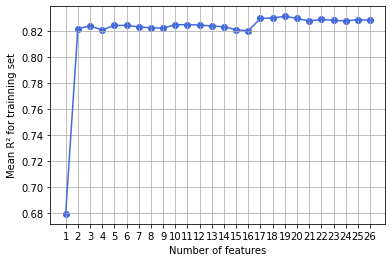

In [71]:
#plot r2 for various features
index=[]
r2=np.zeros(26)
for i,c in enumerate(reversed(indices)):

    index.append(c)

    X_train_rf,X_test_rf,Y_train_rf,Y_test_rf = train_test_split(X.iloc[:,index],
                                                     df_refine.loc[:,['JSC']],train_size=0.8,random_state=12 )

    linreg_rf=LinearRegression()
    linreg_rf.fit(X_train_rf.values,Y_train_rf.values)
    y_pred_rf=linreg_rf.predict(X_test_rf.values)
    y_train_predict_rf=linreg_rf.predict(X_train_rf.values)

    # linreg_score_rfv=-cross_val_score(linreg_rfv,X_train_rfv.values,Y_train_rfv.values,cv=5,scoring='neg_mean_squared_error')
    linreg_r2score_rf=cross_val_score(linreg_rf,X_train_rf.values,Y_train_rf.values,cv=5,scoring='r2')
    # abs_error_rfv=-cross_val_score(linreg_rfv,X_train_rfv.values,Y_train_rfv.values,cv=5,scoring='neg_mean_absolute_error')
    # logmse_rfv=-cross_val_score(linreg_rfv,X_train_rfv.values,Y_train_rfv.values,cv=5,scoring='neg_mean_squared_log_error')

    # average_mse_rfv=np.mean(linreg_score_rfv)
    average_linreg_r2score_rf=np.mean(linreg_r2score_rf)
    
    r2[i]=np.mean(linreg_r2score_rf)
    # average_abserror_rfv=np.mean(abs_error_rfv)
    # average_logmse_rfv=np.mean(logmse_rfv)
    print(f'Iteration: {i+1}')
    # print('Mean Squared error for each cross validation subset:',linreg_score_rfv)
    print('R\u00b2 for each cross validation subset:',linreg_r2score_rf)
    # print('Absolute error for each cross validation subset:',abs_error_rfv)
    # print('Mean Saquared log error for each cross validation subset:',logmse_rfv)
#     print('-'*100)

    # print('Average Mean Squared error for cross validation:',average_mse_rfv)
    print('Average R\u00b2 for cross validation',average_linreg_r2score_rf)
    # print('Average Absolute error for cross validation:',average_abserror_rfv)
    # print('Average Mean Squared log error for cross validation:',average_logmse_rfv)
#     print('-'*100)

    # print('Mean Squared error for prediction:',metrics.mean_squared_error(Y_test_rfv, y_pred_rfv))
    print('R\u00b2 for Prediction:',metrics.r2_score(Y_test_rf, y_pred_rf))
    print('-'*100)
    # print('Mean Absolute error for Prediction:',metrics.mean_absolute_error(Y_test_rfv, y_pred_rfv))
    # print('Mean Squared log error for Prediction:',metrics.mean_squared_log_error(Y_test_rfv, y_pred_rfv))

plt.plot(np.arange(1,27,1),r2,color='royalblue')
plt.scatter(np.arange(1,27,1),r2,color='royalblue')

new_ticks = np.arange(1,27,1)
plt.xticks(new_ticks)
plt.xlabel('Number of features')
plt.ylabel('Mean R\u00b2 for trainning set')
plt.grid()
plt.show()